# Backtracking

Brute force approach to find all solutions to a problem
Unlike DP, which is used to solve an optimization problem (Max or Min), Backtracking finds all possibilities
It uses a DFS

A similar approach is branch and bound which uses BFS instead of DFS



Example : 

If you have two boys and 1 girl, B1, B2, G1
and there are 3 chairs
what are the number of ways you can arrange them ?

3! = 6 ways

The state space tree looks like this

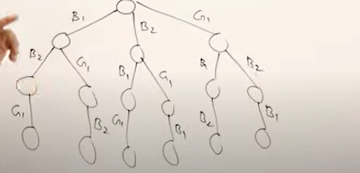

Now there can be further constraints, where for example, you don't want girl in the middle
This is called a bounding function
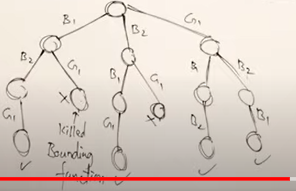

Some trees get killed prematurely if bounding function / constraint is met


In branch and bound, it is the exact same process, but tree is built breadth first instead of depth first

In [ ]:
## References

1) https://www.youtube.com/watch?v=DKCbsiDBN6c

## Practice

## Combination Sum

https://leetcode.com/problems/combination-sum/

Given an array of distinct integers candidates and a target integer target, return a list of all unique combinations of candidates where the chosen numbers sum to target. You may return the combinations in any order.

The same number may be chosen from candidates an unlimited number of times. Two combinations are unique if the frequency of at least one of the chosen numbers is different.

The test cases are generated such that the number of unique combinations that sum up to target is less than 150 combinations for the given input.

In [35]:
from typing import List
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        
        candidates.sort()
        n = len(candidates)
        output = []
        
        
        def dfs(position, currlist, s):
            if (position >= (n)) or (s > target):  ## boundary conditions
                return
            
            if (s==target):
                output.append(currlist.copy())
                return
            
            ## branch 1, with candidate at current position
            currlist.append(candidates[position])
            dfs(position, currlist, s + candidates[position] )
            
            ## branch 2, without candidates at current position (so move on to nextposition)
            currlist.pop()
            dfs(position + 1, currlist, s)
            
        dfs(0, [], 0)
        return output
        
        
        
 

In [32]:
candidates = [2,3,6,7]
target = 7

In [33]:
a = Solution()

In [34]:
a.combinationSum(candidates, target)

1 [[2, 2, 3]]
3 [[7], [7]]


[[], []]

## Word search

https://leetcode.com/problems/word-search/

Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

In [200]:
class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        m, n = len(board), len(board[0])
        word_length = len(word)
        
        output = [False]

       
        def dfs(tup, k, already_visited):
            if (k==(word_length-1)):
                output[0] = True
                return
            i,j = tup

            neighbours = [(i-1, j), (i+1, j), (i, j+1), (i, j-1)]
            k = k + 1
            for neighbour in neighbours:

                i_new, j_new = neighbour
                
                if (i_new<0) or (j_new<0) or (i_new>(m-1)) or (j_new>(n-1)) or ((i_new, j_new) in already_visited): ## outside grid
                    continue
                if board[i_new][j_new]==word[k]:

                    already_visited.add((i_new, j_new))
                    dfs((i_new, j_new), k, already_visited)
                    already_visited.remove((i_new, j_new))
                    
        for i in range(0, m):
            for j in range(0, n):
                if board[i][j]==word[0]:
                    already_visited = set()
                    already_visited.add((i,j))
                    dfs((i, j), 0, already_visited)
        return output[0]

## Subsets
https://leetcode.com/problems/subsets/

Given an integer array nums of unique elements, return all possible subsets (the power set).

The solution set must not contain duplicate subsets. Return the solution in any order.

Input: nums = [1,2,3]
Output: [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

In [28]:
from typing import List
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        n = len(nums)
        output = [] ## stores all sublists which go in final output
        curr_subset = [] ## global variable. which for any given iteration takes a subset to add to
        
        def dfs(i): ## Note the only input is the index i
            
            ## terminating conditions. If end of list is reached, add curr subset to output and return
            if i >= (n):
                output.append(curr_subset.copy()) ## Note how a copy of curr_subset is taken. Otherwise 
                                                  ## since curr_subset is modified in every branch, and this is pass by reference,
                                                  ## will lead to problems
                return
            
            
            ## set up recursion - two scenarios - element included, or element not included
            
            ## element included scenario - we append current element to curr_subset, and then move dfs to next element
            curr_subset.append(nums[i])
            dfs(i+1)
            
            ## element not included
            curr_subset.pop() ## want to remove nums[i] we previously added
            dfs(i+1)
            
        dfs(0) ## call dfs at starting position
        return output
            
    
            
            
            

In [ ]:
## Another slightly different solution

In [29]:
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        
        n = len(nums)
        output = []
        
        def dfs(i, curr_list):
            
            if i >= (n):
                output.append(curr_list.copy())
                return
            
            curr_list.append(nums[i])
            dfs(i+1, curr_list)
            curr_list.pop()
            dfs(i+1, curr_list)
        dfs(0, [])
        return output

In [30]:
a = Solution()

## Subsets 2
https://leetcode.com/problems/subsets-ii/

In [53]:
from collections import Counter
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        
        nums.sort() ## This is important as we want [1,2] to be the same as [2,1], sorting ensures that
        n = len(nums)
        
        output = []
        def dfs(i, curr_list):
            if i>=(n):
                temp = curr_list.copy()
                if temp not in output:  ## This is to ensure if we have [1,1,2], we have two possibilities of [1,2], we don't want to add twice
                    output.append(temp)
                return
            curr_list.append(nums[i])
            dfs(i+1, curr_list)
            curr_list.pop()
            dfs(i+1, curr_list)
        dfs(0, [])
        return output
                
            
                
            
            
            
            
        
        
        

In [54]:
a = Solution()

In [55]:
a.subsetsWithDup([1,2,2])

[[1, 2, 2], [1, 2], [1], [2, 2], [2], []]

## Combination sum 2
https://leetcode.com/problems/combination-sum-ii/description/

In [67]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        
        candidates.sort()  ## good to have numbers in sorted order as [1,2] is identical to [2,1]
        
        output = []
        n = len(candidates)
        
        def dfs(i, curr_list, sum_curr_list):
            print(i, curr_list, sum_curr_list)
            
            ## defining exit conditions
            if i >= n:
                return 
            if sum_curr_list > target:
                return
            if sum_curr_list==target:
                print("here")
                if curr_list not in output:
                    output.append(curr_list.copy())
                return
            
            ## defining recurrence
            
            ## including current element
            curr_list.append(candidates[i])
            sum_curr_list = sum_curr_list + candidates[i]
            dfs(i+1, curr_list, sum_curr_list)
            
            ## excluding current element
            curr_list.pop()
            sum_curr_list = sum_curr_list - candidates[i]
            while (i <= (n-2)):  ## why is this necessary ? assume we have a list [1,2,2,2,3] and i = 1. We decide not to include 2. Then it does not make sense to move i+1 since next element is also 2, so we move to first non-2 value
                if candidates[i] != candidates[i+1]:
                    break
                else:
                    i = i + 1
            dfs(i+1, curr_list, sum_curr_list)
        dfs(0, [], 0)
        return output
            

In [68]:
a = Solution()

In [70]:
sum(candidates)

12

In [69]:
candidates = [2,5,2,1,2]
target = 5
a.combinationSum2(candidates, target)

0 [] 0
1 [1] 1
2 [1, 2] 3
3 [1, 2, 2] 5
here
3 [1, 2] 3
4 [1, 2, 2] 5
here
4 [1, 2] 3
5 [1, 2, 5] 8
5 [1, 2] 3
2 [1] 1
3 [1, 2] 3
4 [1, 2, 2] 5
here
4 [1, 2] 3
5 [1, 2, 5] 8
5 [1, 2] 3
3 [1] 1
4 [1, 2] 3
5 [1, 2, 5] 8
5 [1, 2] 3
4 [1] 1
5 [1, 5] 6
5 [1] 1
1 [] 0
2 [2] 2
3 [2, 2] 4
4 [2, 2, 2] 6
4 [2, 2] 4
5 [2, 2, 5] 9
5 [2, 2] 4
3 [2] 2
4 [2, 2] 4
5 [2, 2, 5] 9
5 [2, 2] 4
4 [2] 2
5 [2, 5] 7
5 [2] 2
2 [] 0
3 [2] 2
4 [2, 2] 4
5 [2, 2, 5] 9
5 [2, 2] 4
4 [2] 2
5 [2, 5] 7
5 [2] 2
3 [] 0
4 [2] 2
5 [2, 5] 7
5 [2] 2
4 [] 0
5 [5] 5
5 [] 0


[[1, 2, 2]]

## Combinations of a phone number
https://leetcode.com/problems/letter-combinations-of-a-phone-number/

In [82]:
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        
        n = len(digits)
        if n==0:
            return []
        mapping_file = {}
        mapping_file['2'] = ["a","b", "c"]
        mapping_file['3'] = ["d","e", "f"]
        mapping_file['4'] = ["g","h", "i"]
        mapping_file['5'] = ["j","k", "l"]
        mapping_file['6'] = ["m","n", "o"]
        mapping_file['7'] = ["p","q", "r", "s"]
        mapping_file['8'] = ["t","u", "v"]
        mapping_file['9'] = ["w","x", "y", "z"]
        
        output_list = []
        
        def dfs(i, curr_list):
            
            if i >= n:
                
                output_list.append("".join(curr_list.copy()))
                return
            
            
            curr_elem = digits[i]
            for elem in mapping_file[curr_elem]:
                
                curr_list.append(elem)
                dfs(i+1, curr_list)
                
                curr_list.pop()
        dfs(0, [])
        return output_list
            
                
                
                
                
        


In [83]:
a = Solution()

## Partition palindromes
https://leetcode.com/problems/palindrome-partitioning/
    
Given a string s, partition s such that every substring of the partition is a palindrome. Return all possible palindrome partitioning of s.

In [122]:
class Solution:
    
    def partition(self, s:str) -> List[List[str]]:
        
        n = len(s)
        output = []
        
        def is_palindrome(st):
            
            if st=="":
                return False
            if st==st[::-1]:
                return True
            else:
                return False
        
        def dfs(i, curr_string, curr_list):
            print(i, curr_string, curr_list)
            
            ## Exit condition
            

            if i >=n :
                print("**************")
                print("writing to output !!")
                print(curr_string)
                
                if is_palindrome(curr_string):
                    curr_list.append(curr_string)

                    output.append(curr_list.copy())
                    curr_list.pop() ## this pop is critical, whereever you append, pop, otherwise the state is changed as it is pass by reference
                return
            
            if is_palindrome(curr_string):
                
                ## situation 1 - terminate at current position
                print("situation 1")
                print("situation 1 curr_list before appending", curr_list)
                curr_list.append(curr_string)
                print("situation 1 curr_list after appending", curr_list)
                dfs(i+1, s[i], curr_list)
                curr_list.pop()
                print("situation 1 curr_list after popping", curr_list)
                
            ## situation 2 - don't terminate at current position
            print("situation 2")
            dfs(i+1, curr_string + s[i], curr_list)
                
 
            
            
        dfs(0, "", [] )
        return output
            
            
            
                
                
        
        
        

In [123]:
a = Solution()

https://leetcode.com/problems/n-queens/
## N-Queens

In [231]:
import copy
class Solution:
    
    def generate_diagonal(self, i,j):
        out = set()
        
        elem1, elem2 = i,j
        while (elem1 >= 0) and (elem2 >= 0):
            out.add((elem1,elem2))
            elem1 = elem1-1
            elem2 = elem2-1
        
        elem1, elem2 = i,j
        while (elem1 <= (n-1)) and (elem2 <= (n-1)):
            out.add((elem1,elem2))
            elem1 = elem1+1
            elem2 = elem2+1
        
        elem1, elem2 = i,j
        while (elem1 <= (n-1)) and (elem2 >=0):
            out.add((elem1,elem2))
            elem1 = elem1+1
            elem2 = elem2-1
        elem1, elem2 = i,j    
        while (elem1 >=0) and (elem2 <= (n-1)):
            out.add((elem1,elem2))
            elem1 = elem1-1
            elem2 = elem2+1
        return out
            
    def solveNQueens(self, n: int) -> List[List[str]]:
        
        curr_array = [[0 for i in range(0, n)] for i in range(0,n)]
        output = []
        
        def dfs(curr_array, num_queen_placed, columns_captured, diagonal_elements):
            
            if num_queen_placed==n:
                print("{0} queens placed".format(num_queen_placed))
                
                output.append(copy.deepcopy(curr_array))
                return
            
            
            for j in range(0, n):
                
                
                if num_queen_placed==3:
                    if j==3:
                        print("3,3")
                        print(diagonal_elements)
                if j in columns_captured:
                    continue
                    
                if (num_queen_placed, j) in diagonal_elements:
                    continue
                curr_array[num_queen_placed][j] = 1
                columns_captured.add(j)
                diagonal = self.generate_diagonal(num_queen_placed, j)
                dfs(curr_array, num_queen_placed+1, columns_captured, diagonal_elements.union(diagonal))
                curr_array[num_queen_placed][j] = 0
                
                columns_captured.remove(j)
                ## diagonal_elements = diagonal_elements - diagonal
                
        dfs(curr_array, 0, set(), set())

        final_output = []
            
            
        for curr_output in output: ## through 1 possible output scenario
            curr_list = []
            for row in curr_output:
                st = ""
                for j in row:
                    if j==1:
                        st = st + "Q"
                    else:
                        st = st + "."
                curr_list.append(st)
            final_output.append(curr_list)
                    
                
        print("output", "final_output", len(output), len(final_output))
        return final_output
                
                

In [232]:
a = Solution()

In [233]:
a.solveNQueens(6)

6 queens placed
6 queens placed
3,3
{(0, 1), (2, 4), (1, 2), (2, 1), (0, 0), (1, 1), (0, 3), (3, 0), (2, 3), (0, 2), (3, 3), (2, 2), (1, 3)}
6 queens placed
6 queens placed
6 queens placed
6 queens placed
3,3
{(0, 1), (1, 2), (2, 1), (3, 4), (0, 0), (1, 1), (0, 3), (1, 4), (3, 0), (2, 3), (3, 3), (2, 2), (2, 5)}
3,3
{(1, 2), (2, 1), (0, 0), (3, 1), (1, 1), (0, 3), (3, 0), (0, 2), (3, 3), (2, 2), (1, 0), (3, 2), (1, 3)}
6 queens placed
6 queens placed
6 queens placed
6 queens placed
6 queens placed
6 queens placed
3,3
{(2, 4), (0, 0), (3, 1), (1, 1), (0, 2), (3, 3), (2, 2), (1, 3)}
6 queens placed
6 queens placed
6 queens placed
6 queens placed
3,3
{(3, 4), (0, 0), (3, 1), (1, 1), (0, 3), (1, 4), (0, 2), (3, 3), (2, 2), (2, 5), (1, 3)}
3,3
{(1, 2), (2, 1), (0, 0), (1, 1), (0, 3), (1, 4), (3, 0), (2, 3), (3, 3), (2, 2), (1, 0), (3, 2)}
6 queens placed
6 queens placed
6 queens placed
6 queens placed
3,3
{(3, 4), (0, 0), (1, 1), (0, 3), (1, 4), (2, 3), (3, 3), (2, 2), (3, 2), (2, 5)}
3,3
{

[['Q.....', '..Q...', '....Q.', '.Q....', '...Q..', '.....Q'],
 ['Q.....', '..Q...', '....Q.', '.Q....', '.....Q', '...Q..'],
 ['Q.....', '..Q...', '....Q.', '.....Q', '.Q....', '...Q..'],
 ['Q.....', '..Q...', '....Q.', '.....Q', '...Q..', '.Q....'],
 ['Q.....', '..Q...', '.....Q', '.Q....', '...Q..', '....Q.'],
 ['Q.....', '..Q...', '.....Q', '.Q....', '....Q.', '...Q..'],
 ['Q.....', '...Q..', '.Q....', '....Q.', '..Q...', '.....Q'],
 ['Q.....', '...Q..', '.Q....', '....Q.', '.....Q', '..Q...'],
 ['Q.....', '...Q..', '.Q....', '.....Q', '..Q...', '....Q.'],
 ['Q.....', '...Q..', '.Q....', '.....Q', '....Q.', '..Q...'],
 ['Q.....', '...Q..', '....Q.', '..Q...', '.Q....', '.....Q'],
 ['Q.....', '...Q..', '....Q.', '..Q...', '.....Q', '.Q....'],
 ['Q.....', '...Q..', '....Q.', '.....Q', '.Q....', '..Q...'],
 ['Q.....', '...Q..', '....Q.', '.....Q', '..Q...', '.Q....'],
 ['Q.....', '...Q..', '.....Q', '..Q...', '.Q....', '....Q.'],
 ['Q.....', '...Q..', '.....Q', '..Q...', '....Q.', '.Q

In [133]:
def generate_diagonal(i,j):
    out = set()

    elem1, elem2 = i,j
    while (elem1 >= 0) and (elem2 >= 0):
        out.add((elem1,elem2))
        elem1 = elem1-1
        elem2 = elem2-1
    elem1, elem2 = i,j
    while (elem1 <= (n-1)) and (elem2 <= (n-1)):
        out.add((elem1,elem2))
        elem1 = elem1+1
        elem2 = elem2+1
    elem1, elem2 = i,j
    while (elem1 <= (n-1)) and (elem2 <= (n-1)):
        out.add((elem1,elem2))
        elem1 = elem1+1
        elem2 = elem2-1



    elem1, elem2 = i,j
    while (elem1 <= (n-1)) and (elem2 <= (n-1)):
        out.add((elem1,elem2))
        elem1 = elem1-1
        elem2 = elem2+1
    return out

In [201]:
our_output = [["Q.....","..Q...",".....Q","...Q..",".Q....","....Q."],["Q.....","....Q.","..Q...",".....Q","...Q..",".Q...."],["Q.....",".....Q","..Q...","....Q.",".Q....","...Q.."],["Q.....",".....Q","...Q..",".Q....","....Q.","..Q..."],[".Q....","...Q..",".....Q","Q.....","..Q...","....Q."],[".Q....",".....Q","...Q..","Q.....","..Q...","....Q."],["..Q...",".....Q",".Q....","....Q.","Q.....","...Q.."],["...Q..","Q.....","....Q.",".Q....",".....Q","..Q..."],["...Q..",".....Q",".Q....","....Q.","..Q...","Q....."],["....Q.","..Q...","Q.....",".....Q","...Q..",".Q...."],[".....Q",".Q....","....Q.","..Q...","Q.....","...Q.."],[".....Q","...Q..","Q.....","..Q...","....Q.",".Q...."]]

In [202]:
correct_output = [[".Q....","...Q..",".....Q","Q.....","..Q...","....Q."],["..Q...",".....Q",".Q....","....Q.","Q.....","...Q.."],["...Q..","Q.....","....Q.",".Q....",".....Q","..Q..."],["....Q.","..Q...","Q.....",".....Q","...Q..",".Q...."]]

In [204]:
[x for x in our_output if x not in correct_output]

[['Q.....', '..Q...', '.....Q', '...Q..', '.Q....', '....Q.'],
 ['Q.....', '....Q.', '..Q...', '.....Q', '...Q..', '.Q....'],
 ['Q.....', '.....Q', '..Q...', '....Q.', '.Q....', '...Q..'],
 ['Q.....', '.....Q', '...Q..', '.Q....', '....Q.', '..Q...'],
 ['.Q....', '.....Q', '...Q..', 'Q.....', '..Q...', '....Q.'],
 ['...Q..', '.....Q', '.Q....', '....Q.', '..Q...', 'Q.....'],
 ['.....Q', '.Q....', '....Q.', '..Q...', 'Q.....', '...Q..'],
 ['.....Q', '...Q..', 'Q.....', '..Q...', '....Q.', '.Q....']]

In [188]:
b

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [189]:
d = b.copy()

In [191]:
d[1][1] = 1

In [217]:
aa = {1,2,3}

In [218]:
aa = set([1,2,3])

In [219]:
aa.union([4,5])

{1, 2, 3, 4, 5}

In [220]:
aa

{1, 2, 3}

In [234]:
aa = {}

In [238]:
aa[(1,2)] = 5

In [244]:
aa[{'goo' : 2}] = 4


TypeError: unhashable type: 'dict'

In [240]:
aa[a] = 5

In [241]:
aa.keys()

dict_keys([(1, 2), <__main__.Solution object at 0x000002BCBFE33E80>])

In [242]:
aa[a]

5